In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.drop('Cabin', inplace=True, axis=1)

In [37]:
df2 = df.dropna()
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [38]:
df2.drop(columns=['PassengerId', 'Name','Ticket','SibSp','Parch'],inplace=True)
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [39]:
df3 = pd.get_dummies(df2, columns = ['Sex', 'Embarked'])
df3

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,29.1250,1,0,0,1,0
886,0,2,27.0,13.0000,0,1,0,0,1
887,1,1,19.0,30.0000,1,0,0,0,1
889,1,1,26.0,30.0000,0,1,1,0,0


In [40]:
X = df3.drop('Survived', axis=1)
Y = df3['Survived']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [42]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [43]:
#Initializing the MLPClassifier
classifier = MLPClassifier()

#Fitting the training data to the network
classifier.fit(X_train, Y_train)

#Predicting y for X_val
y_pred = classifier.predict(X_test)

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, Y_test)

print("Accuracy of MLPClassifier : ", accuracy(cm))
print("Accuracy of MLPClassifier : ",accuracy_score(Y_test,y_pred))

Accuracy of MLPClassifier :  0.780373831775701
Accuracy of MLPClassifier :  0.780373831775701


In [44]:
train_acc = classifier.score(X_train, Y_train)
test_acc = classifier.score(X_test, Y_test)
print(f'Train Accuracy: {train_acc*100: .2f}% - Test Accuracy: {test_acc*100: .2f}%')

Train Accuracy:  80.12% - Test Accuracy:  78.04%


## Q4


In [45]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

model = MLPClassifier()
model.fit(X_train_s, Y_train)

y_pred = model.predict(X_test_s)
print("Accuracy of MLPClassifier with StandardScaler: ", accuracy_score(Y_test, y_pred))

Accuracy of MLPClassifier with StandardScaler:  0.8177570093457944


In [46]:
mms = MinMaxScaler()
X_train_m = mms.fit_transform(X_train)
X_test_m = mms.transform(X_test)

model = MLPClassifier()
model.fit(X_train_m, Y_train)

y_pred = model.predict(X_test_m)
print("Accuracy of MLPClassifier with StandardScaler: ",accuracy_score(Y_test, y_pred))

Accuracy of MLPClassifier with StandardScaler:  0.8084112149532711


## Result:
In this section, standardization has been done using the StandardScaler function and then the MinMaxScaler function.

In the case where standardization has been done using StandardScaler, the accuracy of the model on the test data has reached 81%.

In the case where the standardization is done using MinMaxScaler, the accuracy of the model on the test data has reached 78%.

so with using standardization methods, we imporved model accuracy.

In [47]:
parameter_space = [{
    'learning_rate_init': [1e-1,1e-2,1e-3,1e-4,1e-5], 
    'hidden_layer_sizes': [(100, ), (200, ), (300, ), (400, ), (500, ), (600, ),
     (700, ), (800, ), (900, ), (1000, )],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],        
},{
    'learning_rate_init': [1e-1,1e-2,1e-3,1e-4,1e-5], 
    'hidden_layer_sizes': [(100,), (100,100), (100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],        
}]

grid_search = GridSearchCV(classifier, parameter_space, n_jobs=-1, cv=5)
grid_search.fit(X_train, Y_train) 

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'activation': ['tanh', 'relu'],
                          'hidden_layer_sizes': [(100,), (200,), (300,), (400,),
                                                 (500,), (600,), (700,), (800,),
                                                 (900,), (1000,)],
                          'learning_rate_init': [0.1, 0.01, 0.001, 0.0001,
                                                 1e-05],
                          'solver': ['sgd', 'adam']},
                         {'activation': ['tanh', 'relu'],
                          'hidden_layer_sizes': [(100,), (100, 100),
                                                 (100, 100, 100)],
                          'learning_rate_init': [0.1, 0.01, 0.001, 0.0001,
                                                 1e-05],
                          'solver': ['sgd', 'adam']}])

In [ ]:
print('Best parameters found:\n', grid_search.best_params_)

best_accuracy = grid_search.best_score_
print("\nBest Accuracy: {:.2f} %".format(best_accuracy*100))

In [51]:
#fit model on standard data based on StandardScaler method
grid_search.fit(X_train_s, Y_train)

Best Accuracy: 79.31 %


In [67]:
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

y_pred = grid_search.predict(X_test_s)
print("Accuracy score of model: ",accuracy_score(Y_test, y_pred))

best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 79.71 %
Accuracy score of model:  0.4766355140186916
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'solver': 'adam'}


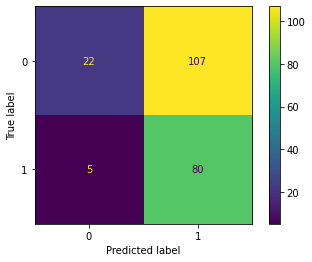

In [68]:
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [54]:
#fit model on standard data based on MinMaxScaler method
grid_search.fit(X_train_m, Y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'activation': ['tanh', 'relu'],
                          'hidden_layer_sizes': [(100,), (200,), (300,), (400,),
                                                 (500,), (600,), (700,), (800,),
                                                 (900,), (1000,)],
                          'learning_rate_init': [0.1, 0.01, 0.001, 0.0001,
                                                 1e-05],
                          'solver': ['sgd', 'adam']},
                         {'activation': ['tanh', 'relu'],
                          'hidden_layer_sizes': [(100,), (100, 100),
                                                 (100, 100, 100)],
                          'learning_rate_init': [0.1, 0.01, 0.001, 0.0001,
                                                 1e-05],
                          'solver': ['sgd', 'adam']}])

In [64]:
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

y_pred = grid_search.predict(X_test_m)
print("Accuracy score of model: ",accuracy_score(Y_test, y_pred))

best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Accuracy: 79.71 %
Accuracy score of model:  0.822429906542056
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'solver': 'adam'}


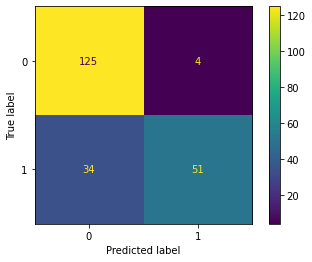

In [65]:
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [66]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       159
           1       0.60      0.93      0.73        55

    accuracy                           0.82       214
   macro avg       0.78      0.86      0.80       214
weighted avg       0.87      0.82      0.83       214

